# Example-2 (How to plot via matplotlib)

## Install matplotlib

In [1]:
import sys
!{sys.executable} -m pip install matplotlib;

You are using pip version 19.0.2, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Plotting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from pycm import ConfusionMatrix

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function modified to plots the ConfusionMatrix object.
    Normalization can be applied by setting `normalize=True`.
    
    Code Reference : 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    """

    plt_cm = []
    for i in cm.classes :
        row=[]
        for j in cm.classes:
            row.append(cm.table[i][j])
        plt_cm.append(row)
    plt_cm = np.array(plt_cm)
    if normalize:
        plt_cm = plt_cm.astype('float') / plt_cm.sum(axis=1)[:, np.newaxis]     
    plt.imshow(plt_cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(cm.classes))
    plt.xticks(tick_marks, cm.classes, rotation=45)
    plt.yticks(tick_marks, cm.classes)

    fmt = '.2f' if normalize else 'd'
    thresh = plt_cm.max() / 2.
    for i, j in itertools.product(range(plt_cm.shape[0]), range(plt_cm.shape[1])):
        plt.text(j, i, format(plt_cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if plt_cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predict')

In [3]:
cm = ConfusionMatrix(matrix={0:{0:13,1:0,2:0},1:{0:0,1:10,2:6},2:{0:0,1:0,2:9}})

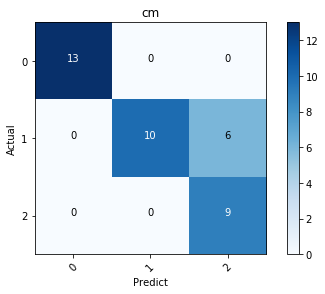

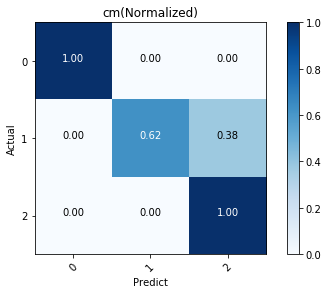

In [4]:

plt.figure()
plot_confusion_matrix(cm,title='cm')
plt.figure()
plot_confusion_matrix(cm,title='cm(Normalized)',normalize=True)
plt.show()